# 1. Data Sources

We are going to use two main sources:
- pandas-datareader: Google, Yahoo APIs accessed for free
- Quandl API: company with free tier access available with an API key

Note for Pandas DataReader: Yahoo and Google have updated their APIs; if they're unstable, use the codes `iex`, `morningstar` or `yahoo` instead (only `yahoo` worked for me). More on string codes:

https://pandas-datareader.readthedocs.io/

**Optional readings**

https://www.investopedia.com/options-basics-tutorial-4583012

https://www.investopedia.com/terms/o/order-book.asp

## 1.1 Pandas DataReader

### Import Stock Time Series

In [7]:
import pandas_datareader.data as web
import datetime

In [8]:
# Define always start and end date to fetch data
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2017,1,1)

In [9]:
# Select stock & source
# yahoo seems to be the only source that works
facebook = web.DataReader('FB','yahoo',start,end)

In [10]:
# High, Low, Open, Close
# Adj Close = Close adjusted in case a stock split or similar has occurred
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000


### Import Options

Requesting for option time series is deprecated as of now. It would have worked as follows:

```python
from pandas_datareader.data import Options
fb_options = Options('FB','yahoo')
options_df = fb_options.get_options_data(expiry=fb_options.expiry_dates[0])
options_df.head()
```

## 1.2 Quandl

Quandl is a company and it charges for advanced options, but we're going to use the free tier.
Many information is available.
Create account and get API key from account settings.
After logged in on the web, press `Explore` and browse free/premium datasets; we can
- browse and filter them with the web interface
- download them as CSVs
- copy the python code to access them

Some of the indicators I've found browsing Quandl
- Stocks (= Equity, USA)
- Real Estate (USA)
- World Bank Data
- Sentiment Data
- Yale Indicators
- ...

Installation:

    pip/3 install quandl
    
However, I had issues with the python versions, so I installed `quandl` through the notebook.
    
    !pip install quandl

In [6]:
# I have problems with th epython version used in the conda environment
# and in the jupyter notebook, which seems to be different (3.6.1 vs 3.9)
# A quick & dirty fix consists in installing quandl from the notebook
!pip install quandl

In [44]:
import quandl
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Load Quandl API key obtained from quandl.com and saved into a TXT file (local)
# Make sure TXT file is only locally: add it to .gitignore to avoid uploading it!
key_file = open('quandl_api_key.txt')
lines = key_file.readlines()
key = lines[0].split('\n')[0]

In [20]:
quandl.ApiConfig.api_key = key

In [21]:
# Define start and end date to fetch data
# If no start & end passed, complete series is retreived
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2017,1,1)

In [28]:
# Time Series: quandl.get()
# Check ticker/code in the official quandl.com page, while browsing datasets
# There is also a description of the data
# In this case: FRED US quarterly GDP
usa_gdp = quandl.get("FRED/GDP", start_date=start, end_date=end)

In [31]:
usa_gdp

,Value
Date,
2015-01-01,18003.399
2015-04-01,18223.577
2015-07-01,18347.425
2015-10-01,18378.803
2016-01-01,18470.156
2016-04-01,18656.207
2016-07-01,18821.359
2016-10-01,19032.580
2017-01-01,19237.435


In [37]:
# CO2 emissions in Spain according to BP
co2_emissions_spain = quandl.get("BP/C02_EMMISSIONS_ESP")

In [40]:
co2_emissions_spain.head()

,Value
Date,
1965-12-31,80.433101
1966-12-31,84.715757
1967-12-31,95.481917
1968-12-31,99.136070
1969-12-31,108.563270


<AxesSubplot:xlabel='Date'>

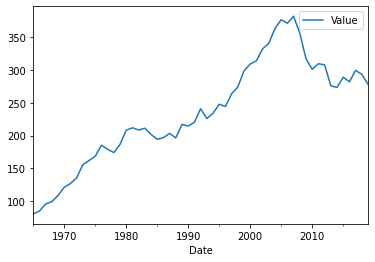

In [46]:
co2_emissions_spain.plot()

In [48]:
# Spain Employment, Millions (IMF)
# We can also get numpy arrays instead of pandas series
employment_spain = quandl.get("ODA/ESP_LE",returns='numpy')

In [49]:
# Numpy array of tuples returned: (date, value)
employment_spain

rec.array([('1980-12-31T00:00:00.000000000', 12.298),
           ('1981-12-31T00:00:00.000000000', 11.981),
           ('1982-12-31T00:00:00.000000000', 11.87 ),
           ('1983-12-31T00:00:00.000000000', 11.809),
           ('1984-12-31T00:00:00.000000000', 11.495),
           ('1985-12-31T00:00:00.000000000', 11.377),
           ('1986-12-31T00:00:00.000000000', 11.589),
           ('1987-12-31T00:00:00.000000000', 12.147),
           ('1988-12-31T00:00:00.000000000', 12.617),
           ('1989-12-31T00:00:00.000000000', 13.066),
           ('1990-12-31T00:00:00.000000000', 13.394),
           ('1991-12-31T00:00:00.000000000', 13.499),
           ('1992-12-31T00:00:00.000000000', 13.257),
           ('1993-12-31T00:00:00.000000000', 12.71 ),
           ('1994-12-31T00:00:00.000000000', 12.621),
           ('1995-12-31T00:00:00.000000000', 12.936),
           ('1996-12-31T00:00:00.000000000', 13.152),
           ('1997-12-31T00:00:00.000000000', 13.626),
           ('1998-12-31T00:0

In [50]:
# IMPORTANT CODES/TICKETS
# "WIKI/<TICKER>": stock values of ticker = AAPL, FB, etc.
# WIKI is the not up-to-date but free database
apple_stock = quandl.get("WIKI/AAPL")

In [52]:
apple_stock.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


In [53]:
# We can also get specific columns putting their indices
apple_stock_open = quandl.get("WIKI/AAPL.1")

In [54]:
apple_stock_open.head()

,Open
Date,
1980-12-12,28.75
1980-12-15,27.38
1980-12-16,25.37
1980-12-17,25.87
1980-12-18,26.63


In [57]:
# European Commission Business and Consumer Surveys
# Looking in the documentation, many data can be obtained
# Example: Consumer Inflation Perceptions
ecbs_table = quandl.get("ECBCS/INF_MAL_5_MU_EU")

In [59]:
ecbs_table.tail()

,risen a lot (++),risen moderately (+),risen slightly (=),stayed about the same (-),fallen (--),don't know,Balance not seasonally adjusted (Balance = PP + P/2 -M/2 - MM)
Date,,,,,,,
2019-01-31,12.76,26.87,36.25,20.21,0.99,2.94,15.10
2019-02-28,14.11,26.34,35.62,20.15,1.09,2.67,16.12
2019-03-31,13.76,27.83,35.55,18.99,1.34,2.50,16.84
2019-04-30,12.23,26.13,34.34,22.96,1.39,2.94,12.42
2019-05-31,15.12,27.41,38.33,16.67,0.78,1.67,19.71


In [60]:
# Table = Entire database: quandl.get_table()
# More complex filtering needs to be applied
# Look in Quandl documentation
# https://docs.quandl.com/docs/python-tables
data = quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, ticker = ['AAPL', 'MSFT'], date = { 'gte': '2016-01-01', 'lte': '2016-12-31' })

In [61]:
data

,ticker,date,close
None,,,
0,MSFT,2016-12-30,62.14
1,MSFT,2016-12-29,62.90
2,MSFT,2016-12-28,62.99
3,MSFT,2016-12-27,63.28
4,MSFT,2016-12-23,63.24
...,...,...,...
499,AAPL,2016-01-08,96.96
500,AAPL,2016-01-07,96.45
501,AAPL,2016-01-06,100.70
